## Testing of SALib RBD-FAST vs. Xu et al. UASA toolbox

Python sensitivity analysis package SALib: https://salib.readthedocs.io/en/latest/

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import genfromtxt
from SALib.sample import latin
from SALib.analyze import rbd_fast
from pyDOE import *

In [109]:
def simple_mod(params):
    return np.sum((np.arange(3) + 1)*np.asarray(params)**2) + params[0]*params[1] + 2*params[1]*params[2] + 3*params[0]*params[2] + params[0]*params[1]*params[2]

In [118]:
def rbd_sample(N):
    """
    RBD-FAST problem setup & sampling.
    Rabdom Balanced Design.
    
    Parameters
    ----------
    N : int
        number of parameters
    
    Returns
    -------
    params : array
        array of parameters
    
    """
    # problem setup
    problem = {
        'num_vars': 3,
        'names': ['x1', 'x2', 'x3'],
        'bounds': [[-3, 3],
                   [-3, 3],
                   [-3, 3]]
    }
    
    # parameter sampling
    params = latin.sample(problem, N)
    
    return params

In [122]:
def rbd_analyze(params):
    """RBD-FAST sensitivity test."""
    
    # model simulations
    y_list = []
    for param in params:
        y_list.append(simple_mod(param))    
    
    # model sensitivity test
    Y = np.array(y_list)
    Si = rbd_fast.analyze(problem, params, Y, print_to_console=False)
    
    return Y, Si

In [123]:
    problem = {
        'num_vars': 3,
        'names': ['x1', 'x2', 'x3'],
        'bounds': [[-3, 3],
                   [-3, 3],
                   [-3, 3]]
    }

In [130]:
params = rbd_sample(1000)
Y_SAlib, Si = rbd_analyze(params)
Si

{'S1': [0.01952051378968903, 0.13760468573987839, 0.24856425074140903],
 'names': ['x1', 'x2', 'x3']}

In [128]:
params = rbd_sample(2000)
Y_SAlib, Si = rbd_analyze(params)
Si

{'S1': [0.024746029322007784, 0.11326775532628783, 0.2514387849067501],
 'names': ['x1', 'x2', 'x3']}

In [131]:
params = rbd_sample(5000)
Y_SAlib, Si = rbd_analyze(params)
Si

{'S1': [0.028881162971331906, 0.12528120527437406, 0.2597514637191449],
 'names': ['x1', 'x2', 'x3']}

In [137]:
params = rbd_sample(10000)
Y_SAlib, Si = rbd_analyze(params)
Si

{'S1': [0.0257766567141414, 0.11312503966270422, 0.24929121470236423],
 'names': ['x1', 'x2', 'x3']}

In [97]:
#np.savetxt('/home/disk/eos8/ach315/upscale/stats/Y_randuniform_xu.txt', Y_randuniform)
#np.savetxt('/home/disk/eos8/ach315/upscale/stats/Y_randuniform_salib.txt', Y_SAlib)

In [140]:
params_uniformrand_10000 = genfromtxt('/home/disk/eos8/ach315/upscale/stats/uniform_rand_10000.txt', delimiter='\t', usecols=[0,1,2],skip_header=1)
Y_uniform_rand_10000, Si_10000 = rbd_analyze(params_uniformrand_10000)
Si_10000

{'S1': [0.028729645894107703, 0.11135783376522504, 0.24777114144712872],
 'names': ['x1', 'x2', 'x3']}

In [141]:
#np.savetxt('/home/disk/eos8/ach315/upscale/stats/Y_uniformrand_10000.txt', Y_uniform_rand_1000)

In [ ]:
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3, 3],
               [-3, 3],
               [-3, 3]]
}

### testing different methods

In [187]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/params.txt', delimiter='\t')
Y_rbd, Si_rbd = rbd_analyze(data)
Si_rbd

{'S1': [0.19688700032140266, 0.24331912669286185, 0.4497022228087725],
 'names': ['x1', 'x2', 'x3']}

In [174]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/params.txt', delimiter='\t')
Y_rbd, Si_rbd = rbd_analyze(data)
Si_rbd

{'S1': [0.23684324934756337, 0.2263213400104228, 0.39002992128468994],
 'names': ['x1', 'x2', 'x3']}

In [138]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/test.FAST.Sam', skip_header=1)
Y_xu, Si_xu = rbd_analyze(data)
#np.savetxt('/home/disk/eos8/ach315/upscale/stats/Y_xu.txt', Y_xu)

In [172]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/test_smallx1.FAST.Sam', skip_header=1)
Y_xu_smallx1, Si_xu = rbd_analyze(data)
#np.savetxt('/home/disk/eos8/ach315/upscale/stats/Y_xu_smallx1.txt', Y_xu_smallx1)

In [150]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/xu_normsample.txt', skip_header=1)
Y_xu_normal, Si_xu_normal = rbd_analyze(data)
#np.savetxt('/home/disk/eos8/ach315/upscale/stats/Y_xu_normal.txt', Y_xu_normal)

In [202]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/param_xu_standnorm.txt', skip_header=1)
Y_xu_standnorm, Si_xu = rbd_analyze(data)
#np.savetxt('/home/disk/eos8/ach315/upscale/stats/Y_xu_standnorm.txt', Y_xu_standnorm)

In [204]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/param_xu_standnorm.txt', skip_header=1)
data

array([[-2.22347219,  0.47354349,  2.03234178],
       [ 1.57276483, -1.15050105, -0.40093309],
       [ 0.45873722, -0.27997277,  0.14441706],
       ...,
       [-0.89492793,  0.03376098,  0.0094884 ],
       [-0.48032141,  0.09169279, -0.47403513],
       [-0.45783628,  0.52039432,  0.08277337]])

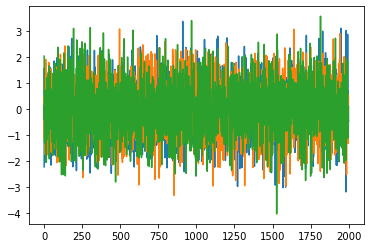

In [205]:
plt.plot(data)

(array([[  0.,   6.,  70., 246., 487., 601., 406., 145.,  32.,   7.],
        [  1.,  13.,  62., 254., 517., 553., 425., 135.,  37.,   3.],
        [  1.,   8.,  76., 221., 500., 594., 405., 155.,  33.,   7.]]),
 array([-4.0335456 , -3.27354285, -2.5135401 , -1.75353735, -0.9935346 ,
        -0.23353185,  0.5264709 ,  1.28647365,  2.0464764 ,  2.80647915,
         3.5664819 ]),
 <a list of 3 BarContainer objects>)

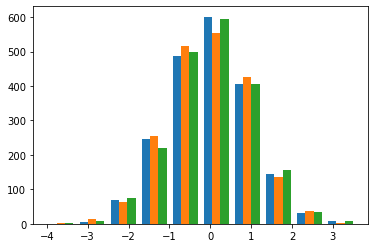

In [212]:
plt.hist(data)

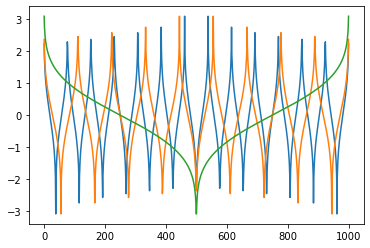

In [54]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/periodic_normal.txt', skip_header=1)
plt.plot(data)

In [55]:
data_transformed = np.fft.fft(data, axis=0)

/home/disk/eos8/ach315/anaconda3/envs/ideotype/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


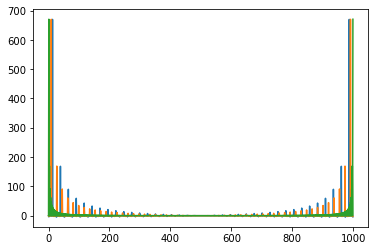

In [56]:
plt.plot(data_transformed)

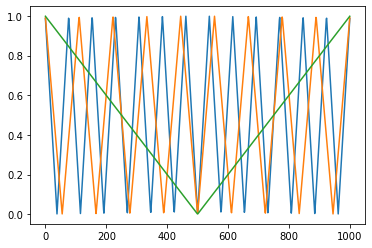

In [47]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/periodic_uniform.txt', skip_header=1)
plt.plot(data)

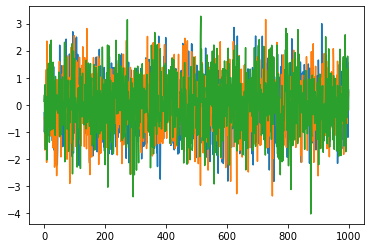

In [53]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/random_normal.txt', skip_header=1)
plt.plot(data)

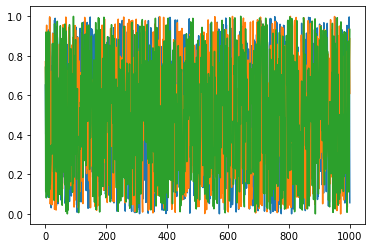

In [71]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/random_uniform.txt', skip_header=1)
plt.plot(data)

(array([[  0.,   3.,  29., 110., 245., 278., 210.,  94.,  27.,   4.],
        [  1.,   7.,  33.,  95., 228., 270., 237.,  99.,  27.,   3.],
        [  2.,   6.,  28.,  96., 205., 288., 226., 102.,  40.,   7.]]),
 array([-4.02415433, -3.29476485, -2.56537536, -1.83598587, -1.10659639,
        -0.3772069 ,  0.35218258,  1.08157207,  1.81096156,  2.54035104,
         3.26974053]),
 <a list of 3 BarContainer objects>)

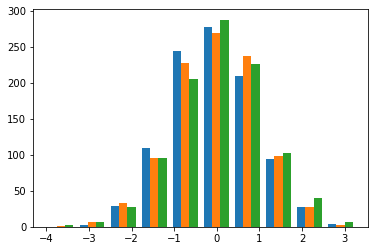

In [45]:
plt.hist(data)

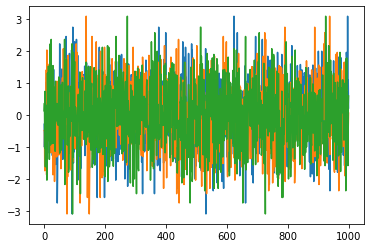

In [46]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/randomgrid_normal.txt', skip_header=1)
plt.plot(data)

In [23]:
data_transformed = np.fft.fft(data, axis=0)

/home/disk/eos8/ach315/anaconda3/envs/ideotype/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


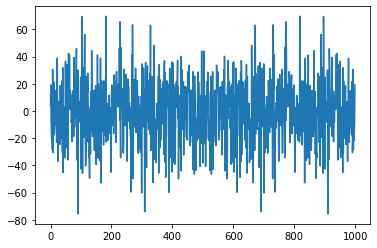

In [28]:
plt.plot(data_transformed[:,2])

(array([[  0.,  19.,  49., 135., 236., 278., 168.,  87.,  24.,   4.],
        [  4.,  11.,  52., 155., 229., 264., 179.,  81.,  23.,   2.],
        [  3.,  12.,  60., 143., 242., 262., 174.,  63.,  35.,   6.]]),
 array([-3.58641109, -2.89196284, -2.19751459, -1.50306633, -0.80861808,
        -0.11416983,  0.58027842,  1.27472667,  1.96917492,  2.66362318,
         3.35807143]),
 <a list of 3 BarContainer objects>)

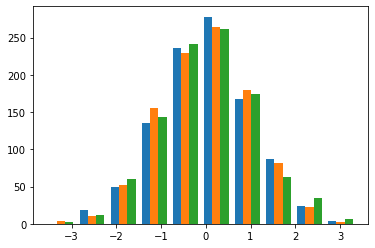

In [13]:
plt.hist(data)

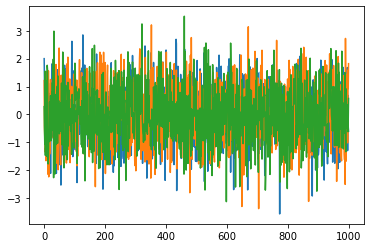

In [32]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/random.txt', skip_header=1)
plt.plot(data)

In [33]:
data_transformed = np.fft.fft(data, axis=0)

/home/disk/eos8/ach315/anaconda3/envs/ideotype/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


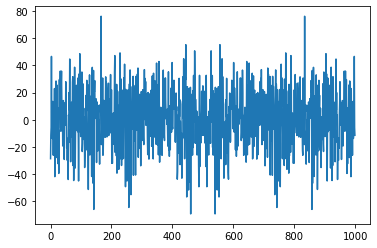

In [36]:
plt.plot(data_transformed[:,2])

(array([[  2.,  12.,  45., 170., 261., 280., 159.,  56.,  14.,   1.],
        [  3.,  12.,  70., 153., 245., 260., 163.,  74.,  17.,   3.],
        [  1.,  15.,  61., 166., 263., 250., 158.,  66.,  17.,   3.]]),
 array([-3.57079296, -2.86160793, -2.1524229 , -1.44323786, -0.73405283,
        -0.02486779,  0.68431724,  1.39350228,  2.10268731,  2.81187235,
         3.52105738]),
 <a list of 3 BarContainer objects>)

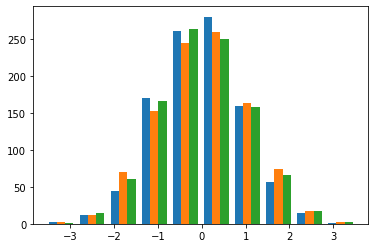

In [15]:
plt.hist(data)

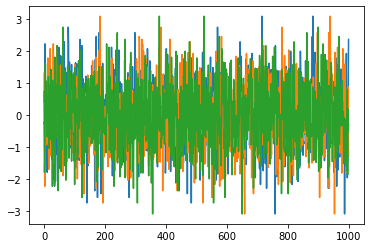

In [16]:
data = genfromtxt('/home/disk/eos8/ach315/upscale/stats/randomgrid.txt', skip_header=1)
plt.plot(data)

(array([[  6.,  26.,  76., 160., 232., 232., 160.,  76.,  26.,   6.],
        [  6.,  26.,  76., 160., 232., 232., 160.,  76.,  26.,   6.],
        [  6.,  26.,  76., 160., 232., 232., 160.,  76.,  26.,   6.]]),
 array([-3.09023230e+00, -2.47218584e+00, -1.85413938e+00, -1.23609292e+00,
        -6.18046461e-01, -1.99840144e-14,  6.18046461e-01,  1.23609292e+00,
         1.85413938e+00,  2.47218584e+00,  3.09023230e+00]),
 <a list of 3 BarContainer objects>)

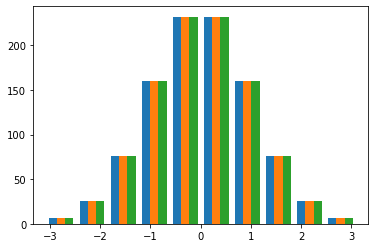

In [17]:
plt.hist(data)